[Previous Page]()                                                [Next Page]()

## Exercise: Some More Algorithms

This notebook shows another class comparison between cuML and Scikit-learn: The `LogisticRegression`. The basic form of logistic regression is used to model the probability of a certain class or event happening based on a set of variables.

We also use this as an example of how cuML can adapt to other GPU centric workflows, this time based on CuPy, a GPU centric NumPy like library for array manipulation: [CuPy](https://cupy.chainer.org)

Thanks to the [CUDA Array Interface](https://numba.pydata.org/numba-doc/dev/cuda/cuda_array_interface.html) cuML is compatible with multiple GPU memory libraries that conform to the spec, and tehrefore can use objects from libraries such as CuPy or Pytorch without additional memory copies!



## Here is the list of exercises and modules in the lab:
<a href='#lr'>Logistic Regression</a><br>
- <a href='#ex1'>Exercise 1</a><br>
- <a href='#ex2'>Exercise 2</a><br>


<a id='lr'></a>
Lets begin by importing our needed libraries:

In [13]:
import pandas as pd
# Lets use cupy in a similar fashion to how we use numpy
import cupy as cp

from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression as skLogistic
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Once again, lets use Scikit-learn to create a dataset to use:

In [14]:
a = datasets.make_classification(10000, n_features=2, n_informative=2, n_redundant=0, 
                                     n_clusters_per_class=1, class_sep=0.5, random_state=1485)

Now lets create our `X` and `y` arrays in CuPy:

In [15]:
X = cp.array(a[0], order='F') # the API of CuPy is almost identical to NumPy
y = cp.array(a[1], order='F')

Lets see how the dataset works:    

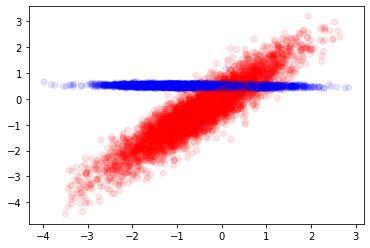

In [16]:
plt.scatter(cp.asnumpy(X[:,0]), cp.asnumpy(X[:,1]), c=[cm_bright.colors[i] for i in cp.asnumpy(y)], 
            alpha=0.1);

Now lets divide our dataset into training and testing datasets in a simple manner:

In [17]:
# Split the data into a training and test set using NumPy like syntax
X_train = X[:8000, :].copy(order='F')
X_test = X[-2000:, :].copy(order='F')
y_train = y[:8000]
y_test = y[8000:10000]

Note that the resulting objects are still CuPy arrays in GPU: 

In [18]:
X_train.__class__

cupy.core.core.ndarray

## Exercise: Fit the cuML and Scikit-learn `LogisticRegression` objects and compare them when they use as similar parameters as possible

* Hint 1: the **default values** of parameters in cuML are **the same** as the default values for Scikit-learn most of the time, so we recommend to leave all parameters except for `solver` as the default 


* Hint 2: Remember the **solver can differ significantly between the libraries**, so look into the solvers offered by both libraries to make them match 


* Hint 3: Even though Scikit-learn expects Numpy objects, it **cannot** accept CuPy objects for many of its methods since it expects the memory to be on CPU (host), not on GPU (device)

For convenience, the notebook offers a few cells to organize your work.

<a id='ex1'></a>

### 1. Fit Scikit-learn LogisticRegression and show its accuracy

<details><summary><b>Solution for Scikit-learn</b></summary>
   <pre>

clf = skLogistic()
clf.fit(X_train.get(), y_train.get())
clf.score(X_test.get(), y_test.get())
</pre>
</details>



In [7]:
from sklearn.metrics import accuracy_score

<a id='ex2'></a>

### 2. Fit cuML Regression and show its accuracy

* Hint 1: Look at the data types expected by cuML methods: https://rapidsai.github.io/projects/cuml/en/stable/api.html#cuml.LogisticRegression.fit 
   one or more of the input vectors might not be of the expected data type! You may need to typecast.



* Hint 2: as mentioned above, cuML has native support for CuPy objects

<details><summary><b>Solution for CuML</b></summary>
   <pre>

reg = LogisticRegression()
reg.fit(X_train,y_train)

print("Coefficients:")
print(reg.coef_)
print("Intercept:")
print(reg.intercept_)

preds = reg.predict(X_test)

print(preds)

print('Scikit-learn accuracy: ' + str(reg.score(X_test, y_test)))
</pre>
</details>

In [24]:
from cuml import LogisticRegression
import numpy as np

In [22]:
# useful methods: cupy_array.astype(np_dtype) converts an array from one datatype to np_datatype, where np_datatype can be something like np.float32, np.float64, etc.
# useful methods: cudf_seris.to_array() converts a cuDF Series to a numpy array
# useful methods: cp.asnumpy(cupy_array) converts cupy to numpy


Coefficients:
[[-1.28726705]
 [ 2.75051631]]
Intercept:
[-0.812162]
Scikit-learn accuracy: 0.8025000095367432


**Expected accuracies for apples to apples comparison: 0.8025 vs 0.8695**

Additional Exercise: Play with the different parameters, particularly the different Scikit-learn solvers to see how they differ in behavior even in the same library!

## Licensing
  
This material is released by NVIDIA Corporation under the Creative Commons Attribution 4.0 International (CC BY 4.0).

[[1]]()
[[2]]()
[[3]]()
[[4]]()
[[5]]()